In [15]:
from imutils import paths
import pickle
import os
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [12]:
img = cv2.imread("./frames/frame2558.jpg")
w = img.shape[1]
h = img.shape[0]

In [24]:
images = list(paths.list_images('Friends/Train'))
known_encoding = []
known_names = []
descriptors_dict = {}
detector = dlib.get_frontal_face_detector()
sift = cv2.xfeatures2d.SIFT_create()
for image_path in tqdm(images):
    name = image_path.split(os.path.sep)[-1].split()[0]
    img = cv2.imread(image_path)
    img = cv2.resize(img, (w, h), interpolation=cv2.INTER_CUBIC)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)
    mask = np.zeros(gray.shape, dtype="uint8")
    descriptors_1 = None
    fl = 0
    for face in faces:
        fl = 1
        x1 = face.left() # left point
        y1 = face.top() # top point
        x2 = face.right() # right point
        y2 = face.bottom() # bottom point
        for i in range(mask.shape[0]):
            for j in range(mask.shape[1]):
                if i > y1 and i < y2 and j > x1 and j < x2:
                    mask[i][j] = 1
        keypoints_1, descriptors_1 = sift.detectAndCompute(gray,mask=mask)
    # print(name)
    if fl == 1:
        if name not in descriptors_dict.keys():
            descriptors_dict[name] = []
        descriptors_dict[name].append(descriptors_1)
    # plt.imshow(img_rgb)
    # plt.show()

100%|██████████| 297/297 [00:58<00:00,  5.11it/s]


In [25]:
pickle.dump(descriptors_dict, open("sift", "wb"))

[[46, 'ross'], [45, 'rachel'], [44, 'rachel'], [43, 'rachel'], [42, 'ross'], [41, 'ross'], [40, 'joey'], [39, 'phoebe'], [39, 'ross'], [38, 'phoebe']]
monica


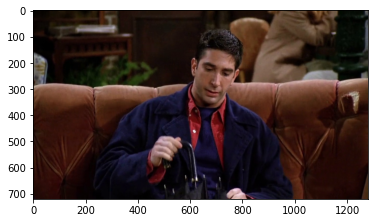

In [55]:
img = cv2.imread("./frames/frame4200.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
faces = detector(gray)
mask = np.zeros(gray.shape, dtype="uint8")
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
descriptors_1 = None
fl = 0
for face in faces:
    fl = 1
    x1 = face.left() # left point
    y1 = face.top() # top point
    x2 = face.right() # right point
    y2 = face.bottom() # bottom point
    for i in range(mask.shape[0]):
        for j in range(mask.shape[1]):
            if i > y1 and i < y2 and j > x1 and j < x2:
                mask[i][j] = 1
    keypoints_1, descriptors_1 = sift.detectAndCompute(gray,mask=mask)
    value = 0
    name = None
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    scores = []
    for key in descriptors_dict.keys():
        for descriptors in descriptors_dict[key]:
            matches = bf.match(descriptors_1,descriptors)
            new_value = len(matches)/descriptors.shape[0] 
            scores.append([len(matches), key])
            if value < new_value:
                value = new_value
                name = key
    scores.sort(key=lambda y:y[0], reverse=True)
    print(scores[:10])
    print(name)
    plt.imshow(img)